In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [2]:
# Adjust path if needed
df = pd.read_csv('/content/Academic.csv')
df.head()


,Mental Status,Study Hours per Week,Attendance Rate,Gender,Previous Physics average,Previous Chemistry average,Previous Mathematics average,Extracurricular Activities,Family Support,failures,...,freetime,goout,Dalc,Walc,absences,guardian,schoolsup,paidClass,Parent Education,plans
0,Normal,9.3,95.3,Male,53.23,50.61,52.5,NaN,Minimal,1,...,2,3,2,4,5,mother,High,NaN,High school,2
1,Severe,17.6,76.8,Female,52.54,51.40,62.4,High,Minimal,1,...,3,3,4,1,4,mother,High,NaN,High school,20
2,Moderate,8.8,89.3,Male,59.77,54.76,72.7,NaN,Minimal,1,...,3,3,1,1,2,father,High,NaN,NaN,15
3,Moderate,8.8,73.8,Male,53.21,77.21,69.3,High,NaN,1,...,5,2,1,2,6,father,High,NaN,Master,24
4,Moderate,17.9,38.6,Male,58.16,50.12,93.6,NaN,NaN,0,...,2,3,0,3,7,father,High,NaN,Degree,15


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Mental Status                  10000 non-null  object 
 1   Study Hours per Week           9523 non-null   float64
 2   Attendance Rate                9495 non-null   float64
 3   Gender                         10000 non-null  object 
 4   Previous Physics average       10000 non-null  float64
 5   Previous Chemistry average     10000 non-null  float64
 6   Previous Mathematics  average  9473 non-null   float64
 7   Extracurricular Activities     5103 non-null   object 
 8   Family Support                 5977 non-null   object 
 9   failures                       10000 non-null  int64  
 10  famrel                         10000 non-null  float64
 11  freetime                       10000 non-null  int64  
 12  goout                          10000 non-null  

In [4]:
# Define pass if all three averages > 60
df['pass_fail'] = (
    (df['Previous Physics average'] > 60) &
    (df['Previous Chemistry average'] > 60) &
    (df['Previous Mathematics  average'] > 60)
).astype(int)

df['pass_fail'].value_counts()


,count
pass_fail,
0,8133
1,1867


In [5]:
features = [
  'Study Hours per Week',
  'Attendance Rate',
  'Previous Physics average',
  'Previous Chemistry average',
  'Previous Mathematics  average'
]
X = df[features]
y = df['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler()),
  ('normalizer', Normalizer()),
  ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('normalizer', Normalizer()),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [7]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9145

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1627
           1       0.78      0.75      0.77       373

    accuracy                           0.91      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.91      0.91      0.91      2000


Confusion Matrix:
 [[1548   79]
 [  92  281]]


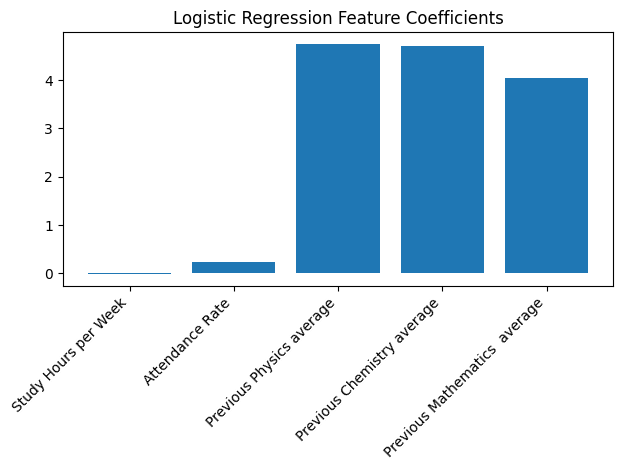

In [9]:
# 3. Feature Coefficients
coef = pipeline.named_steps['clf'].coef_[0]
feat_names = X_train.columns

plt.figure()
plt.bar(feat_names, coef)
plt.xticks(rotation=45, ha='right')
plt.title("Logistic Regression Feature Coefficients")
plt.tight_layout()
plt.show()
